In [ ]:
# dois scripts elaborados por prof. Dourival Júnior para encontrar a melhor reta pelo método dos mínimos quadrados
#A função será linear do tipo: y=b+a.x
#No método dos mínimos quadrados os valores de a e b são determinados a partir das fórmulas:
#    a=(somatorio(x*y).somatorio(x)-somatorio(x^2).somatorio(y))/((somatorio(x))^2-n*somatorio(x^2))
#    b=(somatorio(x).somatorio(y)-n*somatorio(x*y))/((somatorio(x))^2-n*somatorio(x^2))   

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#abrindo o arqivo em formato csv
arq=pd.read_csv('dadosfunclin.csv')

In [ ]:
#fazendo a leitura do arquivo, e verificando sua formatação
arq.head()

,x,y
0,1.0,2.5
1,2.0,4.6
2,3.5,8.2
3,5.1,12.0


In [ ]:
n=len(arq)
print(f'A matriz tem {n} linhas')

A matriz tem 4 linhas


In [ ]:
#criando um novo arquivo com todas as colunas necessárias
arq['x**2']= arq ['x']**2 
arq['x*y']= arq ['x']*arq['y'] 

In [ ]:
#tabela completa para o MMQ
print(arq)

     x     y   x**2   x*y
0  1.0   2.5   1.00   2.5
1  2.0   4.6   4.00   9.2
2  3.5   8.2  12.25  28.7
3  5.1  12.0  26.01  61.2


In [ ]:
#calculando os somatórios
somatoriox=arq['x'].sum()
somatorioy=(arq['y']).sum()
somatorioxy=(arq['x*y']).sum()
somatorioxquad=(arq['x']**2).sum()
somatorioquadx=(somatoriox)**2
#somatorioquadx=somatoriox**2
print(somatoriox,somatorioy,somatorioxy,somatorioxquad,somatorioquadx)

11.6 27.299999999999997 101.6 43.26 134.56


In [ ]:
#calulando os parâmetros a e b    
#a=(somatorio(x*y).somatorio(x)-somatorio(x^2)*somatorioy)/((somatorio(x))^2-n*somatorio(x^2))
a=(somatorioxy*somatoriox-somatorioxquad*somatorioy)/(somatorioquadx-n*somatorioxquad)
print('a=',a)

a= 0.0633575883575851


In [ ]:
b=(somatoriox*somatorioy-n*somatorioxy)/(somatorioquadx-n*somatorioxquad)
print('b=',b)

b= 2.331600831600833


In [ ]:
#escrevendo a função
print(f'y={a:.5f}+{b:.5f}.x')   #5 casas decimais

y=0.06336+2.33160.x


In [ ]:
#plotando 
import matplotlib.pyplot as plt

In [ ]:
x=arq['x']
y=arq['y']
x1=arq['x'].min()-1
x2=arq['x'].max()+1
xx= [x1,x2]
yy=[(a+b*x1),(a+b*x2)]


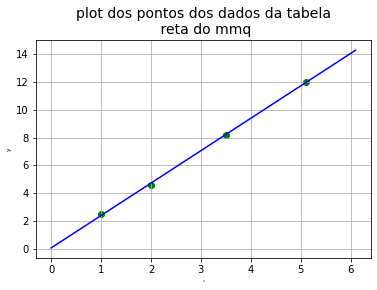

In [ ]:
plt.scatter(x, y, color='green')
plt.plot(xx, yy, color='blue')
plt.title('plot dos pontos dos dados da tabela\n reta do mmq', fontsize=14)
plt.xlabel('x', fontsize=3)
plt.ylabel('y',fontsize=6)
plt.grid(True)
plt.show()

In [ ]:
#podemos usar o método do gradiente descendente na regressão linear

In [ ]:
#Para fazer a estimativa de teta0 e teta1 (iniciais) eu vou usar dois pontos do próprio dataframe
teta1=(y[1]-y[0])/(x[1]-x[0])   # Aqui vamos determinar o coeficiente angular (teta1) e o lienar (teta2) a partir de 2 pontos.
teta0=y[1]-teta1*x[1]
print(teta1,teta0)

2.0999999999999996 0.40000000000000036


In [ ]:
#número de iterações i
iter=100


In [ ]:
L=0.01 #learning rate

In [ ]:
for i in range(1,iter):
    y_pred=teta1*x+teta0
    dteta1=np.sum(x*(y_pred-y))*2/n
    dteta0=np.sum((y_pred-y))*2/n
    teta1=teta1-dteta1*L
    teta0=teta0-dteta0*L
    #aqui vou fazer o plot da função custo:
    mse=sum(y_pred-y)**2/n
    print(i,mse)
plt.plot(i, mse, color='blue')
plt.show()
print(f'y={teta0:.5f}+{teta1:.5f}.x')   #5 casas decimais


In [ ]:
#FIM